In [7]:
import os
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import openai
import pandas as pd
import plotly.express as px

from dotenv import load_dotenv

load_dotenv()

openai.api_key = os.getenv('OPENAI_API_KEY')
openai.organization = os.getenv('ORGANIZATION_ID')

embedding_words = pd.DataFrame([['Arabic', 'الذكاء الصناعي'],
 ['Bengali', 'কৃত্রিম বুদ্ধিমত্তা'],
 ['Chinese', '人工智能'],
 ['Dutch', 'Kunstmatige intelligentie'],
 ['French', 'Intelligence artificielle'],
 ['German', 'Künstliche Intelligenz'],
 ['Greek', 'Τεχνητή νοημοσύνη'],
 ['Hebrew', 'בינה מלאכותית'],
 ['Hindi', 'कृत्रिम बुद्धि'],
 ['Indonesian', 'Kecerdasan Buatan'],
 ['Italian', 'Intelligenza artificiale'],
 ['Japanese', '人工知能'],
 ['Korean', '인공 지능'],
 ['Persian', 'هوش مصنوعی'],
 ['Polish', 'Sztuczna inteligencja'],
 ['Portuguese', 'Inteligência artificial'],
 ['Russian', 'Искусственный интеллект'],
 ['Spanish', 'Inteligencia artificial'],
 ['Swahili', 'Akili bandia'],
 ['Turkish', 'Yapay zeka'],
 ['Afrikaans', 'Kunsmatige intelligensie'],
 ['Albanian', 'Intelegjenca artificiale'],
 ['Armenian', 'Արքայական բանականություն'],
 ['Azerbaijani', 'Süni intellekt'],
 ['Basque', 'Inteligentzia artifizial'],
 ['Belarusian', 'Штучны інтэлект'],
 ['Bosnian', 'Veštačka inteligencija'],
 ['Bulgarian', 'Изкуствен интелект'],
 ['Croatian', 'Umjetna inteligencija'],
 ['Czech', 'Umělá inteligence'],
 ['Danish', 'Kunstig intelligens'],
 ['Estonian', 'Tehisintellekt'],
 ['Filipino', 'Artipisyal na inteligensya'],
 ['Finnish', 'Tekoäly'],
 ['Georgian', 'ხელოვნური ჭკვიანდი'],
 ['Hungarian', 'Mesterséges intelligencia'],
 ['Icelandic', 'Gervigreind'],
 ['Irish', 'Intleacht shaorga'],
 ['Lithuanian', 'Dirbtinis intelektas'],
 ['Mongolian', 'Хиймэл оюун']], columns=['language', 'word_AI'])

embedding_words

,language,word_AI
0,Arabic,الذكاء الصناعي
1,Bengali,কৃত্রিম বুদ্ধিমত্তা
2,Chinese,人工智能
3,Dutch,Kunstmatige intelligentie
4,French,Intelligence artificielle
5,German,Künstliche Intelligenz
6,Greek,Τεχνητή νοημοσύνη
7,Hebrew,בינה מלאכותית
8,Hindi,कृत्रिम बुद्धि
9,Indonesian,Kecerdasan Buatan


In [2]:
"""1. Amharic (Ethiopia): ተንከባላዊ አስተሳሰብ (tankabalawi āstesasb)
2. Burmese (Myanmar): အစ္တရံသောင်ကို ငြိမ်ရေး (artificial nyimyay)
3. Cebuano (Philippines): Artipisyal nga intelihensya
4. Gujarati (India): કૃત્રિમ બુદ્ધિ (kr̥trim buddhi)
5. Haitian Creole: Entèlijans atifisyèl
6. Hausa (Nigeria): Kuɗin hankali
7. Hmong (Vietnam, Laos, China): Kev tiv thaiv txog kev paub (Artificial paub)
8. Igbo (Nigeria): Ikenga omume amanwere
9. Inuktitut (Canada): ᐅᖃᐅᓯᓕᕆᓂᖅ ᐋᓐᓂᖅ (uqausiliriniq aanniq)
10. Kannada (India): ಕೃತಕ ಬುದ್ಧಿ (kṛtaka buddhi)
11. Khmer (Cambodia): ពហុមេរបុរាណ (pheakmareboran)
12. Kurdish (Kurdistan): Deha Zaniyê
13. Lao (Laos): ຄວາມຫຍິ້ນທີ່ສ້າງຂຶ້ນ (khuam hyn thi sang khun)
14. Malagasy (Madagascar): Harenina sy fahendrena manokana
15. Malayalam (India): കൃത്രിമ ബുദ്ധി (kr̥trima buddhi)
16. Maori (New Zealand): Atamai hangarau
17. Nahuatl (Mexico): Tlapohualmoztli
18. Pashto (Afghanistan, Pakistan): د سیمی لوړ ځان (dasme lulor zan)
19. Quechua (Peru, Ecuador, Bolivia): Wasichay yachay
20. Zulu (South Africa): Ucabangisiselo kodwa"""

'1. Amharic (Ethiopia): ተንከባላዊ አስተሳሰብ (tankabalawi āstesasb)\n2. Burmese (Myanmar): အစ္တရံသောင်ကို ငြိမ်ရေး (artificial nyimyay)\n3. Cebuano (Philippines): Artipisyal nga intelihensya\n4. Gujarati (India): કૃત્રિમ બુદ્ધિ (kr̥trim buddhi)\n5. Haitian Creole: Entèlijans atifisyèl\n6. Hausa (Nigeria): Kuɗin hankali\n7. Hmong (Vietnam, Laos, China): Kev tiv thaiv txog kev paub (Artificial paub)\n8. Igbo (Nigeria): Ikenga omume amanwere\n9. Inuktitut (Canada): ᐅᖃᐅᓯᓕᕆᓂᖅ ᐋᓐᓂᖅ (uqausiliriniq aanniq)\n10. Kannada (India): ಕೃತಕ ಬುದ್ಧಿ (kṛtaka buddhi)\n11. Khmer (Cambodia): ពហុមេរបុរាណ (pheakmareboran)\n12. Kurdish (Kurdistan): Deha Zaniyê\n13. Lao (Laos): ຄວາມຫຍິ້ນທີ່ສ້າງຂຶ້ນ (khuam hyn thi sang khun)\n14. Malagasy (Madagascar): Harenina sy fahendrena manokana\n15. Malayalam (India): കൃത്രിമ ബുദ്ധി (kr̥trima buddhi)\n16. Maori (New Zealand): Atamai hangarau\n17. Nahuatl (Mexico): Tlapohualmoztli\n18. Pashto (Afghanistan, Pakistan): د سیمی لوړ ځان (dasme lulor zan)\n19. Quechua (Peru, Ecuador, Bo

In [3]:
#embedding_data = openai.Embedding.create(input=list(embedding_words.word_AI), model="text-embedding-ada-002")['data']
#embeddings = [e["embedding"] for e in embedding_data]
#np.savetxt('./artificial-intelligence.emb', embeddings)
embeddings = np.loadtxt('./artificial-intelligence.emb')
embeddings.shape


(40, 1536)

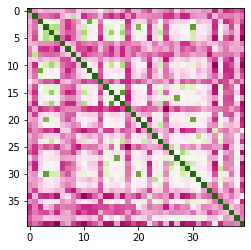

In [4]:
plt.imshow(embeddings @ embeddings.T, cmap='PiYG')

[0.15468342 0.07252517 0.06738256 0.05688259 0.04760545]


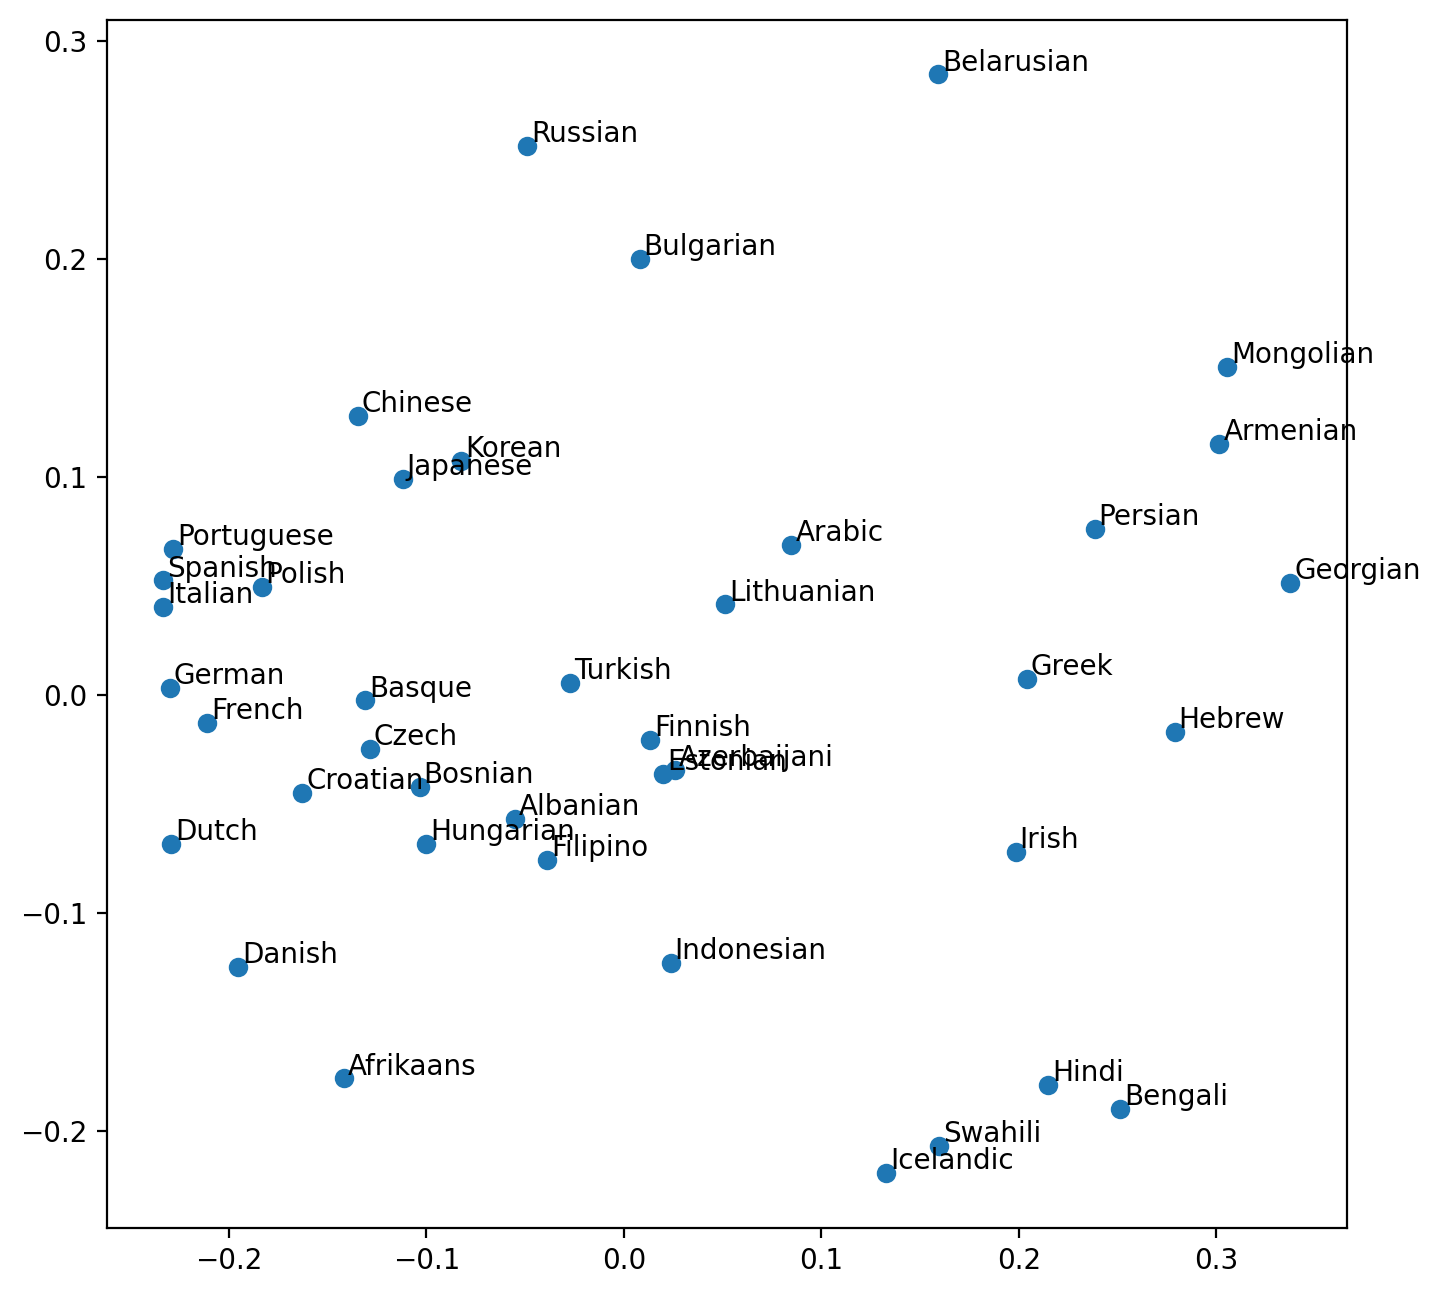

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

fit_count = 40
transform_count = 40

pca.fit(embeddings[:fit_count])

embedding_transform = pca.transform(embeddings[:transform_count])

print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(8,8), dpi=200)

#X = LA.norm(embedding_transform.T[0], axis=0)
#Y = LA.norm(embedding_transform.T[1:2], axis=0)
#C = LA.norm(embedding_transform.T[2:3], axis=0)
X = embedding_transform.T[0]
Y = embedding_transform.T[2]
C = LA.norm(embedding_transform.T[0:1], axis=0)

ax.scatter(X, Y, cmap='seismic')

coords = np.vstack([X, Y]).T

for idx, name in enumerate(embedding_words.language[:transform_count]):
    ax.annotate(name, coords[idx] + (0.002, 0.002))

In [9]:
from sklearn.manifold import TSNE

X = embeddings[:transform_count]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

/Users/sunkev/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sunkev/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.38308078050613403

In [16]:
embedding_words.language[:transform_count].values

array(['Arabic', 'Bengali', 'Chinese', 'Dutch', 'French', 'German',
       'Greek', 'Hebrew', 'Hindi', 'Indonesian', 'Italian', 'Japanese',
       'Korean', 'Persian', 'Polish', 'Portuguese', 'Russian', 'Spanish',
       'Swahili', 'Turkish', 'Afrikaans', 'Albanian', 'Armenian',
       'Azerbaijani', 'Basque', 'Belarusian', 'Bosnian', 'Bulgarian',
       'Croatian', 'Czech', 'Danish', 'Estonian', 'Filipino', 'Finnish',
       'Georgian', 'Hungarian', 'Icelandic', 'Irish', 'Lithuanian',
       'Mongolian'], dtype=object)

In [20]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], text=embedding_words.language[:transform_count].values)
fig.update_layout(
    title="t-SNE visualization of language embeddings",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
    height=800,
    width=800
)
fig.show()

